Hypothesis Test Results

Cloud Cover:
Low Cloud Mean: 5104.75 kWh
High Cloud Mean: 2495.45 kWh
Mean Difference: 2609.30 kWh
p-value: 4.97e-26

Temperature:
Cool Days Mean: 3716.85 kWh
Warm Days Mean: 5053.18 kWh
Mean Difference: 1336.34 kWh
p-value: 1.91e-09


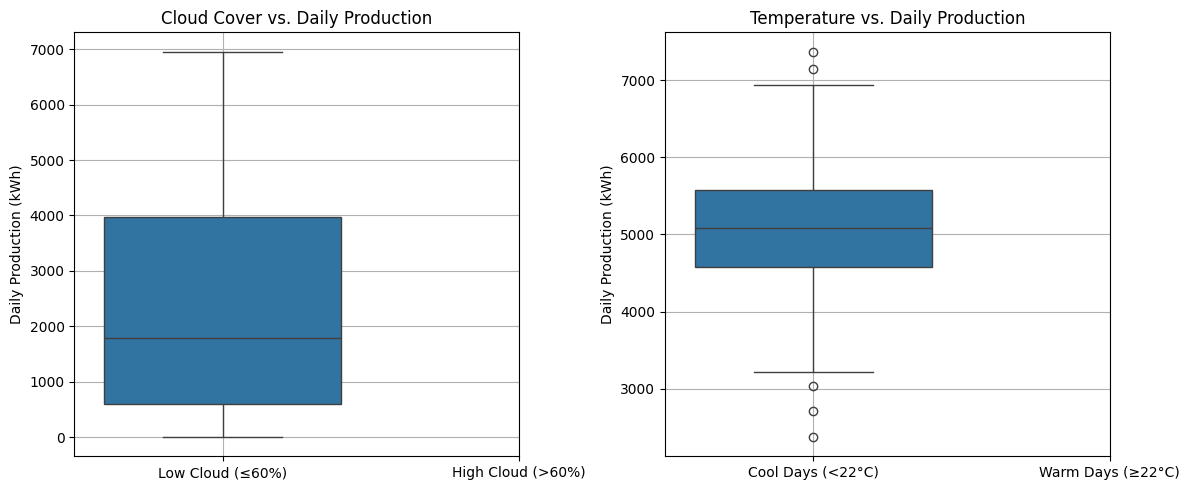

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Dosya yolu
file_path = r"C:\Users\alpgu\OneDrive\Desktop\DSA PROJECFT\train_data.xlsx"

# Veriyi oku
df = pd.read_excel(file_path)

# Boş değerleri temizle (gerekirse)
df = df.dropna(subset=["Üretim (kWh)", "CloudCover_%", "Temp_mean_C"])

# Gruplar: Bulutluluk
low_cloud = df[df["CloudCover_%"] <= 60]["Üretim (kWh)"]
high_cloud = df[df["CloudCover_%"] > 60]["Üretim (kWh)"]

# Gruplar: Sıcaklık
cool_days = df[df["Temp_mean_C"] < 22]["Üretim (kWh)"]
warm_days = df[df["Temp_mean_C"] >= 22]["Üretim (kWh)"]

# T-testleri
t_cloud, p_cloud = ttest_ind(low_cloud, high_cloud, equal_var=False)
t_temp, p_temp = ttest_ind(warm_days, cool_days, equal_var=False)

# Sonuçları yazdır
print("Hypothesis Test Results\n")

print("Cloud Cover:")
print(f"Low Cloud Mean: {low_cloud.mean():.2f} kWh")
print(f"High Cloud Mean: {high_cloud.mean():.2f} kWh")
print(f"Mean Difference: {low_cloud.mean() - high_cloud.mean():.2f} kWh")
print(f"p-value: {p_cloud:.2e}\n")

print("Temperature:")
print(f"Cool Days Mean: {cool_days.mean():.2f} kWh")
print(f"Warm Days Mean: {warm_days.mean():.2f} kWh")
print(f"Mean Difference: {warm_days.mean() - cool_days.mean():.2f} kWh")
print(f"p-value: {p_temp:.2e}")

# Görselleştirme
plt.figure(figsize=(12, 5))

# Bulutluluk grafiği
plt.subplot(1, 2, 1)
sns.boxplot(data=[low_cloud, high_cloud])
plt.xticks([0, 1], ['Low Cloud (≤60%)', 'High Cloud (>60%)'])
plt.ylabel('Daily Production (kWh)')
plt.title('Cloud Cover vs. Daily Production')
plt.grid(True)

# Sıcaklık grafiği
plt.subplot(1, 2, 2)
sns.boxplot(data=[cool_days, warm_days])
plt.xticks([0, 1], ['Cool Days (<22°C)', 'Warm Days (≥22°C)'])
plt.ylabel('Daily Production (kWh)')
plt.title('Temperature vs. Daily Production')
plt.grid(True)

plt.tight_layout()
plt.show()

Analysis of Environmental Effects on Daily Solar Energy Production
The figure presents two boxplots examining how environmental conditions—cloud cover and temperature—affect daily solar energy production (in kWh).

1. Cloud Cover vs. Daily Production
The left boxplot compares daily production on days with low cloud cover (≤60%) and high cloud cover (>60%):

Low Cloud Cover (≤60%) days show a higher median production and a wider range of values, indicating that solar energy production is generally more efficient under clearer skies.

High Cloud Cover (>60%) significantly lowers the median and overall energy output, suggesting that dense cloudiness inhibits solar irradiance, reducing photovoltaic efficiency.

The spread of data under low cloud conditions also includes higher maximum values, further highlighting the benefit of clearer weather.

2. Temperature vs. Daily Production
The right boxplot compares daily production on cooler days (<22°C) and warmer days (≥22°C):

Cool Days (<22°C) exhibit a higher median daily production, implying that lower temperatures may favor solar panel efficiency—likely due to reduced thermal resistance in photovoltaic cells.

Warm Days (≥22°C) tend to have a lower median and more compressed interquartile range, suggesting slightly reduced performance under heat stress.

The presence of multiple outliers in both conditions reflects the influence of additional variables beyond temperature alone.

Conclusion
Both cloud cover and temperature have measurable impacts on solar energy production. Lower cloud coverage and moderate temperatures (below 22°C) are associated with higher and more consistent daily energy outputs. These findings support the importance of meteorological forecasting in optimizing solar energy yield and panel deployment strategies.